In [ ]:
# Reference:
#    https://peterroelants.github.io/posts/gaussian-process-kernels/
#    https://peterroelants.github.io/posts/gaussian-process-kernels/
# 
# https://github.com/pyro-ppl/numpyro

import numpy as np
import jax.numpy as jnp

import matplotlib.pyplot as plt
import matplotlib as mpl
# https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['font.size'] = 25
mpl.rcParams['font.family'] = 'Times New Roman'
cmap = plt.cm.get_cmap('bwr')
# cmap = plt.cm.get_cmap('YlGnBu')

import sys
sys.path.append('../kernel')
from jaxkern import (rbf_kernel, linear_kernel, cov_se, cov_rq, cov_pe)

from plt_utils import plt_savefig, plt_scaled_colobar_ax
from plt_sample_from_gp import plt_gp_samples

In [ ]:
## Parameters

nt = 500
xlim = (-3,3)
ylim = (-3,3)
ϵ = .0001
kernels = {
    'SE(ℓ=1)': cov_se,
    'RQ(α=1,ℓ=1)': cov_rq,
    'PE(p=1,ℓ=1)': lambda X: cov_pe(X, p=1)}

## Plotting

gridspec_kw = {'width_ratios': [2, 1], 'height_ratios': [1,1,1]}
fig, axs = plt.subplots(3, 2, gridspec_kw=gridspec_kw)
fig.set_size_inches(15, 15)

for i, (kernel_name, kernel) in enumerate(kernels.items()):
    X = np.expand_dims(np.linspace(*xlim, nt), 1)
    μ = np.zeros(nt)
    Σ = kernel(X)
    f = np.random.multivariate_normal(μ, Σ+ϵ*np.eye(nt), size=3).T
    plt_gp_samples(X, f, μ, Σ, fig, axs[i,:], description=f" where  $k$=${kernel_name}$", xlim = xlim, ylim=ylim)
fig.tight_layout()
plt_savefig(fig, 'summary/assets/plt_sample_from_gp.png')


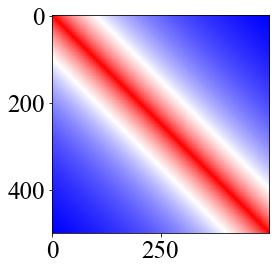